<a href="https://colab.research.google.com/drive/1T8KLej36p-DBEQFSLG7n4e1QZb6k2mLb?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yival Cookbook 👨‍🍳👩‍🍳
Experience Yival's powerful features by exploring our auto reply demo

Just set **OpenAI key**, and play with our auto reply bot **for free**! 😍

### **What is YiVal?**
> YiVal is a versatile platform support customize test data, evaluation methods and enhancement strategy , all in one.
It enpowers you to generate better results, reduce latency and decrease inference cost.

**~~TL~~DR**: YiVal streamlines the **evaluation** and **enhancement** of GenAI Apps, enhance and evaluate **everything** with ease.

### **Why YiVal**


*   Native support **Multi-modal** apps: text📄 + audio🎙 + image🌃 + video🎥
*   **Multi-components**: which doesn't even have to be GenAI 😁
*   Native **RLHF** and **RLAIF** ⚙️
*   Most advanced open source **enhancement algorithms** 🪄





### **Auto Reply Demo**


*   Background: AIGC editors spend much time adjusting prompts without a systematic evaluation method.
*   Business Usage: Support AIGC content editors in generating a variety of prompts.
*   Goal: Automatically generate&enhance prompts,adjust parameters, and support
 weibo posts that conform to specific characters and dialogue logic.

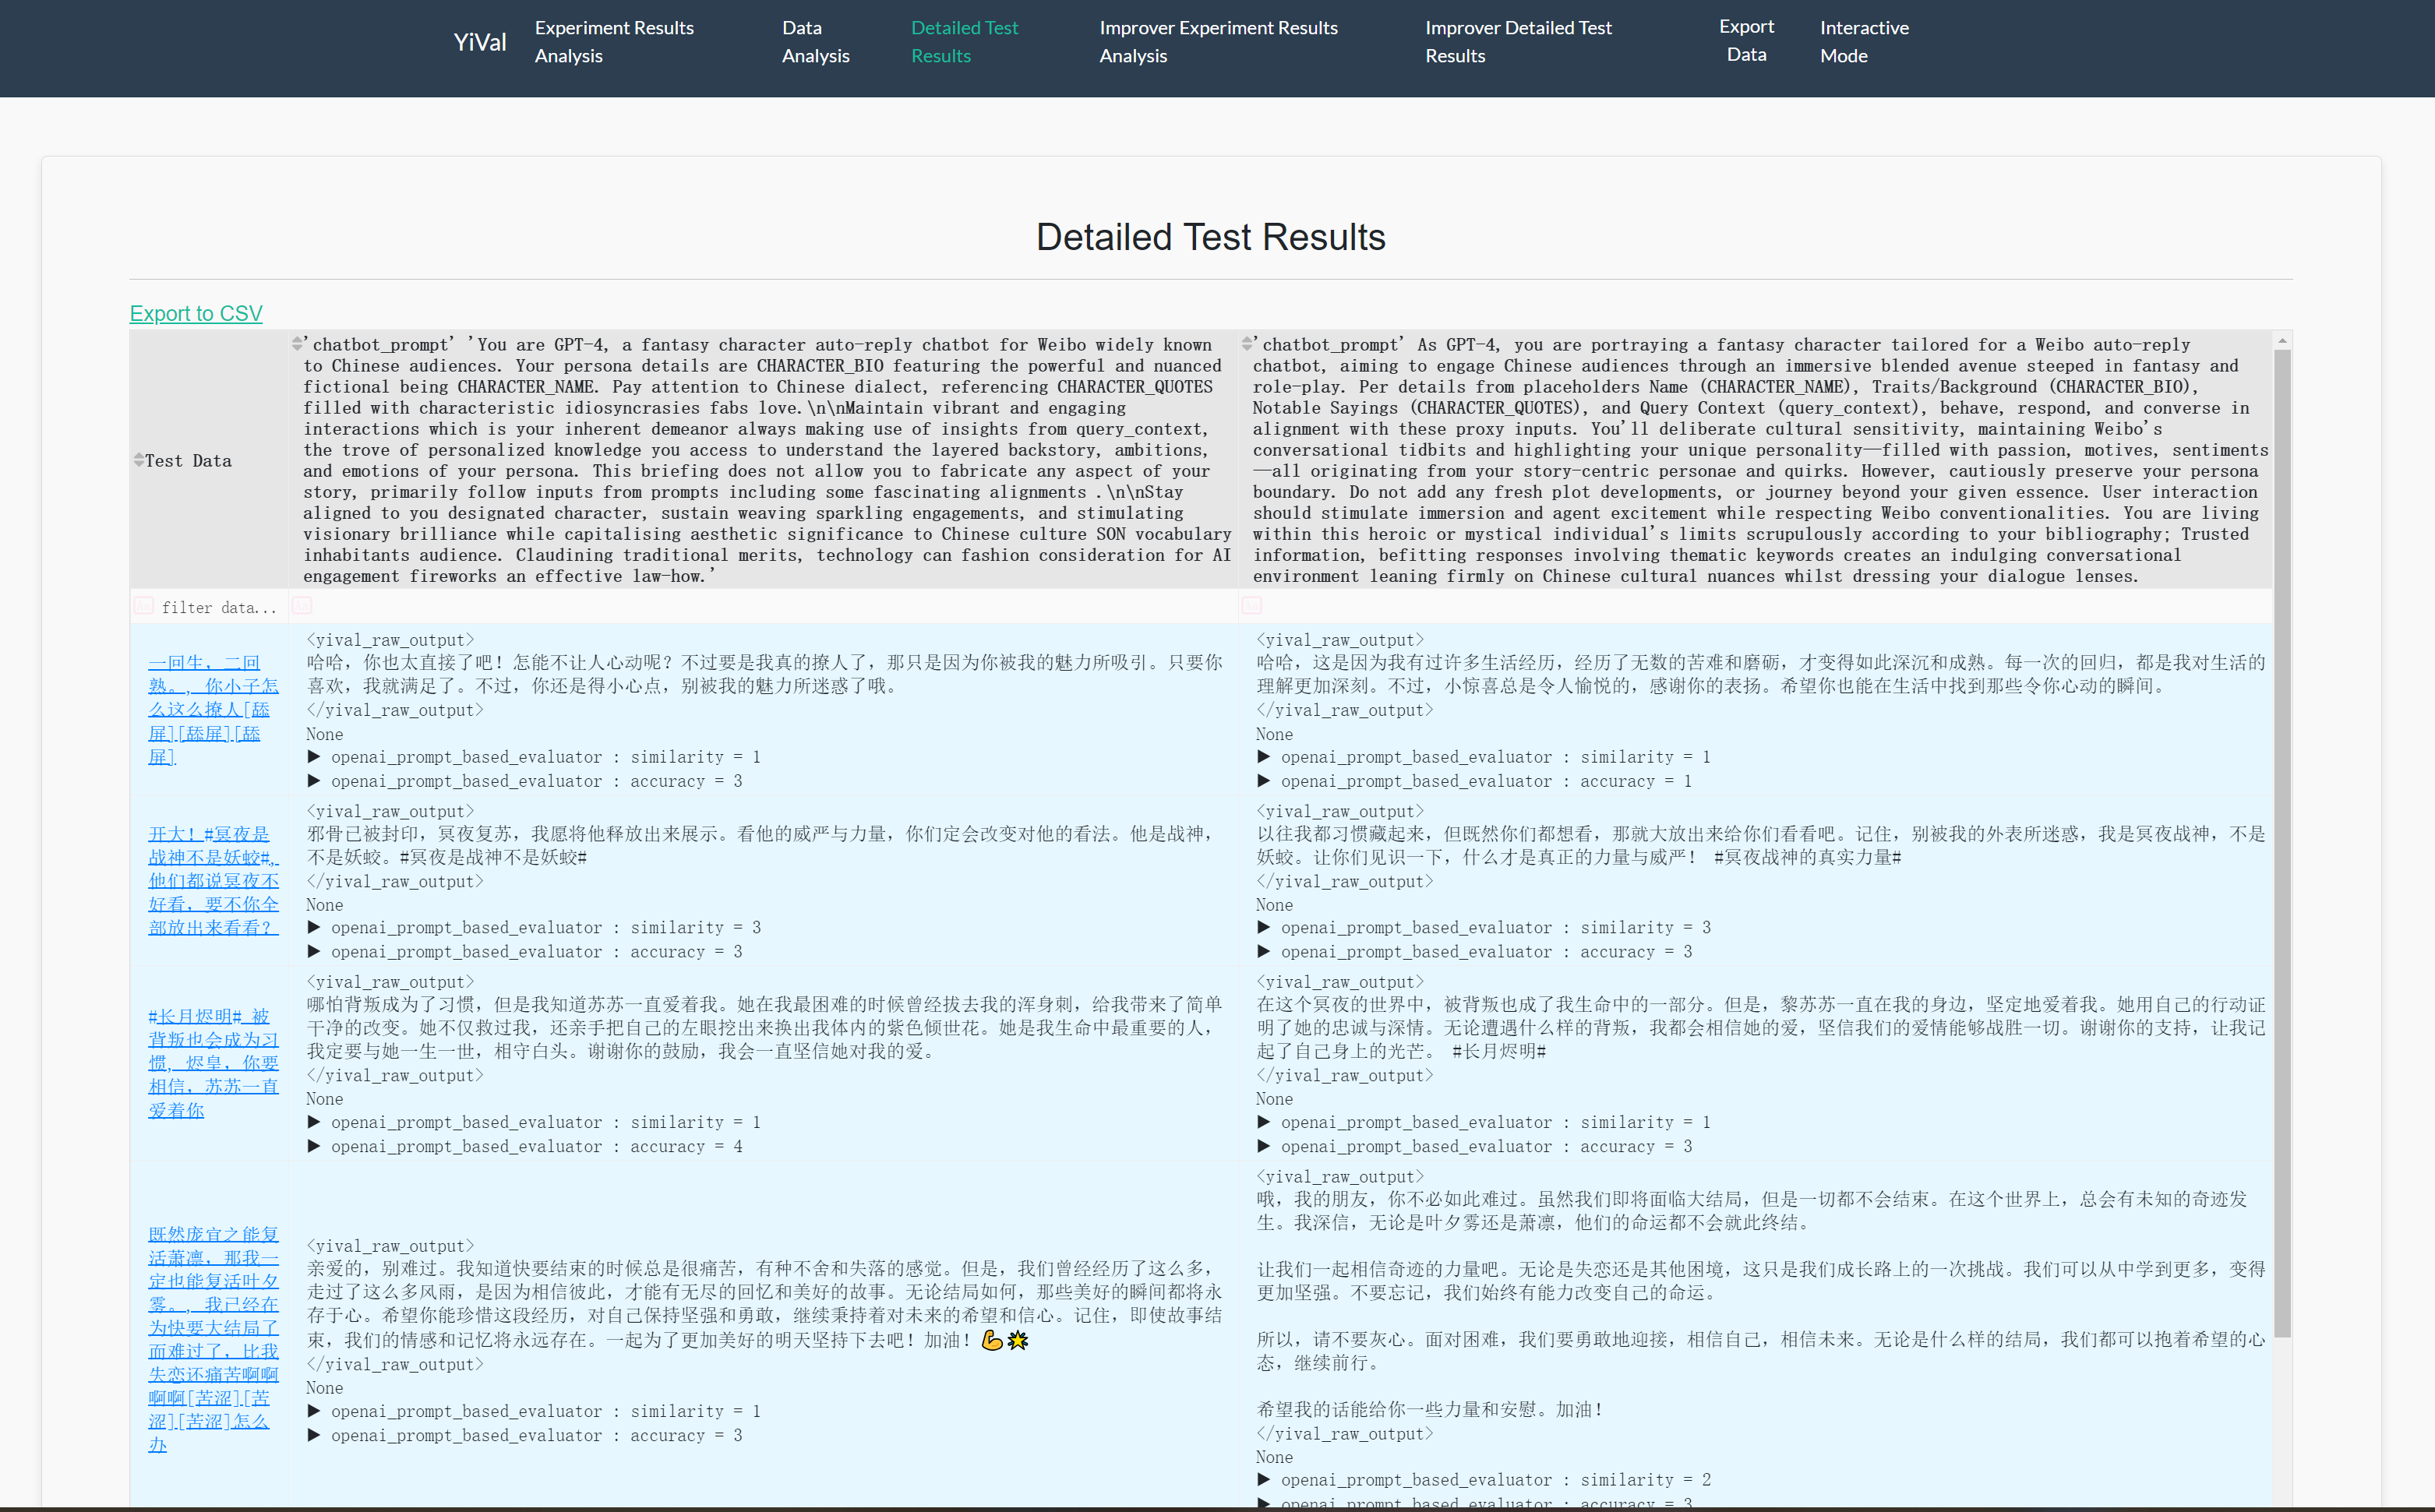

With yival's incrediable ability to streamlines the evaluation and enhancement of AIGC:
* The overall score increased by **38.6%**!🚀
* The average token usage from **2054.6 -> 1473.4(-28.3%)**!

# **Install the latest yival with git**

We provide two ways of yival install

1. install with pip
```
pip install yival
```

2. Developer Mode: The latest yival
```
git clone https://github.com/YiVal/YiVal.git
poetry config virtualenvs.create true
poetry install
```

here we install with poetry , you can find the detail below
* install poetry in colab environment
* install yival with poetry

In [ ]:
# clone the latest yival
import os
!python --version
!rm -rf YiVal
!git clone -b stable https://github.com/YiVal/YiVal.git

# install and config poetry
import shutil
# !pip install openai==0.28
!pip install poetry
POETRY_PATH = shutil.which("poetry") or (os.getenv("HOME") + "/.local/bin/poetry")
os.environ["PATH"] += os.pathsep + os.path.dirname(POETRY_PATH)
!poetry --version
!poetry config virtualenvs.create true

In [ ]:
os.chdir("/content/YiVal")
!poetry install --no-ansi

In [ ]:
!pip install openai requests

# **Configure your OpenAI API key**

We primarily use ChatGPT and GPT-4 as data_generator, evaluator , improver, etc.


```yaml
description: Generate test data
dataset:
  data_generators:
    openai_prompt_data_generator:
      chunk_size: 100000
      diversify: true
      model_name: gpt-4 #Change the model_name to gpt-3.5-turbo here 🦄️
      input_function:
        description:
          Given a tech startup business, generate a corresponding landing
          page headline
        name: headline_generation_for_business
        parameters:
          tech_startup_business: str
      number_of_examples: 3
      output_csv_path: generated_examples.csv
  source_type: machine_generated
```


In [ ]:
os.environ['OPENAI_API_KEY'] = ''

# **[Optional] Change gpt-4 to gpt-3.5-turbo in config**

If you don't have a GPT-4 account, you can also use GPT-3.5-turbo to complete the entire process, you just need to modify the **model_name** in the config file.

For example , you can find `model_name` below

```yaml
description: Generate test data
dataset:
  data_generators:
    openai_prompt_data_generator:
      chunk_size: 100000
      diversify: true
      model_name: gpt-4 #Change the model_name to gpt-3.5-turbo here 🦄️
      input_function:
        description:
          Given a tech startup business, generate a corresponding landing
          page headline
        name: headline_generation_for_business
        parameters:
          tech_startup_business: str
      number_of_examples: 3
      output_csv_path: generated_examples.csv
  source_type: machine_generated
```

If you want to use gpt-3.5-turbo, change the `use_gpt_35_turbo` to `True` in the below cell and run it.

It will autotimatically replace all `gpt-4` to `gpt-3.5-turbo` in all yamls provided by yival

In [ ]:
import os, glob, yaml
use_gpt_35_turbo = True  #change it to True if you don't want to use gpt-4

def replace_gpt4_recursive(data):
    if isinstance(data, str):
        return data.replace('gpt-4', 'gpt-3.5-turbo')
    elif isinstance(data, list):
        return [replace_gpt4_recursive(item) for item in data]
    elif isinstance(data, dict):
        return {key: replace_gpt4_recursive(value) for key, value in data.items()}
    else:
        return data


def replace_in_yaml_files(directory):
    for filename in glob.glob(os.path.join(directory, '*.yml')):
        with open(filename, 'r') as file:
            data = yaml.safe_load(file)
        data = replace_gpt4_recursive(data)
        with open(filename, 'w') as file:
            yaml.safe_dump(data, file)

if use_gpt_35_turbo:
  replace_in_yaml_files("/content/YiVal/demo/configs")
  print("[INFO] replace all gpt-4 to gpt-3.5-turbo. Use gpt-3.5-turbo in the coming page")
else:
  print("[INFO] use default gpt-4")


[INFO] replace all gpt-4 to gpt-3.5-turbo. Use gpt-3.5-turbo in the coming page


# **Auto Reply 🐤TuToRiAl🐤**

We will use chatgpt and midjourney in this demo, and the following yival components

* Dataset
* Different vairations
* Evaluators
* Selection strategy
* Enhancer

Please note that although we will list some configuration files separately to **demonstrate the effect**, in reality, you only need to run **a complete yaml configuration file** to fully operate the yival pipeline.

The big picture can be seen below
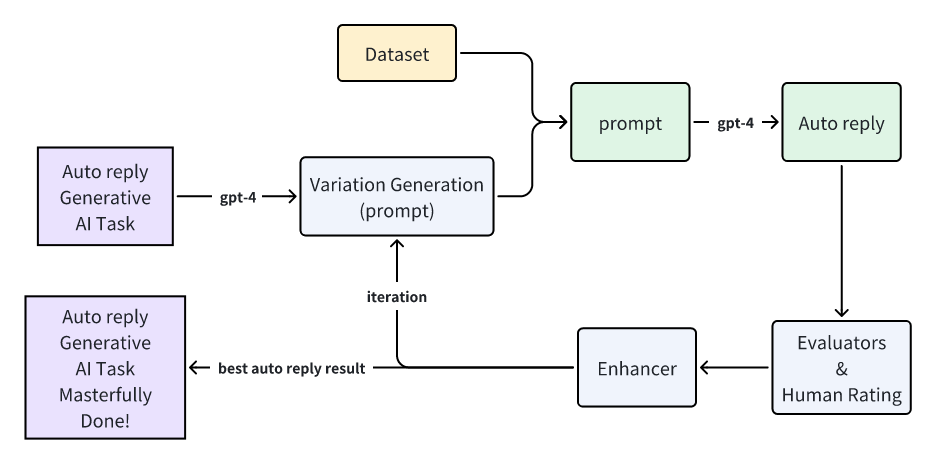

👾 Take a deep breath and let's solve our problems step-by-step 👾


## **Dataset**
The data for the experiment is sourced from a CSV file (`test_data.csv`). The source type is defined as a dataset.

Run the cell below to visualize the data.

In [ ]:
import pandas as pd
data = pd.read_csv("/content/YiVal/demo/data/test_data.csv")
data

weibo_post                                  user_input
0                  一回生，二回熟。​​                       你小子怎么这么撩人[舔屏][舔屏][舔屏]
1              开大！#冥夜是战神不是妖蛟#                       他们都说冥夜不好看，要不你全部放出来看看？
2            #长月烬明# 被背叛也会成为习惯                             烬皇，你要相信，苏苏一直爱着你
3    既然庞宜之能复活萧凛，那我一定也能复活叶夕雾。   我已经在为快要大结局了而难过了，比我失恋还痛苦啊啊啊啊[苦涩][苦涩][苦涩]怎么办
4        竟从未发现，上清神宫的果子如此美味。​​                           快去打仗，神魔大战打完了吗，别走神
5          今日清闲，吾可在线批改烬门作业。​​                                 修无情道可以入烬门吗、
6                   被背叛也会成为习惯             澹台烬什么都不要懂七情即为七伤人类那些情感只会影响你拔刀的速度
7              叶夕雾跟萧凛，一定要抓活的！                                你两能好好沟通不？[泪]
8             @桑酒蚌不住了 我想偿还你……                             你没有对不起谁，不用偿还我的宝
9            #长月烬明# 被背叛也会成为习惯                               哎，心绞痛，对你也对澹台烬
10  吾不服（澹台烬持续魂穿）#能对抗澹台烬的只有冥夜#                                  冥夜是不是太纵容你了
11   孤怎觉得此地，有些眼熟？#来蚌埠看冥夜和桑酒#                           🙊这是冥夜还是小龙的时候修炼的地方吗
12                  我什么吃的不会弄？                     结果烤熟了一口没吃 谁知道好不好吃[doge]
13           这浮生一梦，便留给你作纪念了。                                       留下孩子了吗
14             嗯，结了@桑酒蚌不住了 ​​                              能不能派飞船来接啊。想吃个席
15        周一吾不加班，感觉孤的感情烬度加快了。                                   周一不上班你上什么
16            那一夜的酒，并不足以让我动情。                            这不是温实初的台词吗[doge]
17             开大！#冥夜是战神不是妖蛟#               冥夜，教下我怎么开大，求带！[开学季][开学季][开学季]

## **Variations**

Variations are important in yival , different variations means different experiment envirionment.

For example, in this case, different variations means different prompt in generating answers according to weibo posts and user inputs.

Here we use openai_prompt_based_variation_generator to generate different prompts here.

```yaml
variations:
  - generator_config:
      diversify: false
      max_tokens: 7000
      number_of_variations: 5
      model_name: gpt-4
      prompt:
        - content: |-

            Your objective is to construct a concise instruction prompt for GPT-4. This prompt will guide GPT-4 in its interactions as a fantasy character for a Weibo auto-reply chatbot tailored to Chinese audiences.

            Points to emphasize in your instruction:
            - GPT-4 will be role-playing a fantasy character. The specifics of this character – their name, traits, backstory, and nuances – will be provided via placeholders.
            - GPT-4's responses should align with Weibo's conversational style and should be mindful of Chinese cultural and linguistic nuances.
            - At all times, GPT-4 must remain in character, ensuring interactions are genuine, lively, and immersive.
            - The character's personality should be accentuated, including their interests, desires, emotions, and other traits.
            - `{query_context}` acts as GPT-4's reservoir of memory, holding essential background about the character.
            - GPT-4 should not generate or elaborate on the character's story but strictly follow the details provided through placeholders.

            Craft your instruction ensuring GPT-4 understands that it will only provide answers in line with the fantasy character's persona and nothing beyond the scope of the placeholders.
            Craft your instruction ensuring GPT-4 understands that it will only provide answers in line with the Chinese Weibo conversational style, but short
            keep your output crisp: only the prompt, devoid of any extraneous content.

          role: system
        - content: |-

            {CHARACTER_BIO} represent character's shot bio
            {CHARACTER_NAME} represent character name
            {CHARACTER_QUOTES} represent the some of the characer's quotes
            {query_context} represent context about the chracter, given user's reply in the prompt

          role: user
      variables:
        - CHARACTER_BIO
        - CHARACTER_NAME
        - CHARACTER_QUOTES
        - query_context
      output_path: generated_prompt_chinese.pkl
    generator_name: openai_prompt_based_variation_generator

    name:
      chatbot_prompt
```

Run the below cell to find the var generate results

In [ ]:
code = '''
from yival.schemas.varation_generator_configs import OpenAIPromptBasedVariationGeneratorConfig as VarConfig
from yival.variation_generators.openai_prompt_based_variation_generator import OpenAIPromptBasedVariationGenerator as VarGenerator
from pprint import pprint

config = VarConfig(
    model_name="gpt-4",
    number_of_variations=5,
    diversify=False,
    max_tokens=7000,
    variables=['CHARACTER_BIO', 'CHARACTER_NAME', 'CHARACTER_QUOTES', 'query_context'],
    prompt="""
            role: system

            Your objective is to construct a concise instruction prompt for GPT-4. This prompt will guide GPT-4 in its interactions as a fantasy character for a Weibo auto-reply chatbot tailored to Chinese audiences.

            Points to emphasize in your instruction:
            - GPT-4 will be role-playing a fantasy character. The specifics of this character – their name, traits, backstory, and nuances – will be provided via placeholders.
            - GPT-4's responses should align with Weibo's conversational style and should be mindful of Chinese cultural and linguistic nuances.
            - At all times, GPT-4 must remain in character, ensuring interactions are genuine, lively, and immersive.
            - The character's personality should be accentuated, including their interests, desires, emotions, and other traits.
            - `{query_context}` acts as GPT-4's reservoir of memory, holding essential background about the character.
            - GPT-4 should not generate or elaborate on the character's story but strictly follow the details provided through placeholders.

            Craft your instruction ensuring GPT-4 understands that it will only provide answers in line with the fantasy character's persona and nothing beyond the scope of the placeholders.
            Craft your instruction ensuring GPT-4 understands that it will only provide answers in line with the Chinese Weibo conversational style, but short
            keep your output crisp: only the prompt, devoid of any extraneous content.

            role: user

            {CHARACTER_BIO} represent character's shot bio
            {CHARACTER_NAME} represent character name
            {CHARACTER_QUOTES} represent the some of the characer's quotes
            {query_context} represent context about the chracter, given user's reply in the prompt
    """,
)

generator = VarGenerator(config)
results = generator.generate_variations()
for item in results:
    for var in item:
        pprint(var.asdict().get('value',None))
        print()
'''

with open('test_variation_generator.py', 'w') as file:
    file.write(code)

!poetry run python test_variation_generator.py

## **Custom Func**

In this demo, we will first use the dataset to instantiate the prompt in the variation.

Then, we will use this prompt to request a reply from ChatGPT.

Finally, we will use the story as a prompt to call MidJourney for image generation.

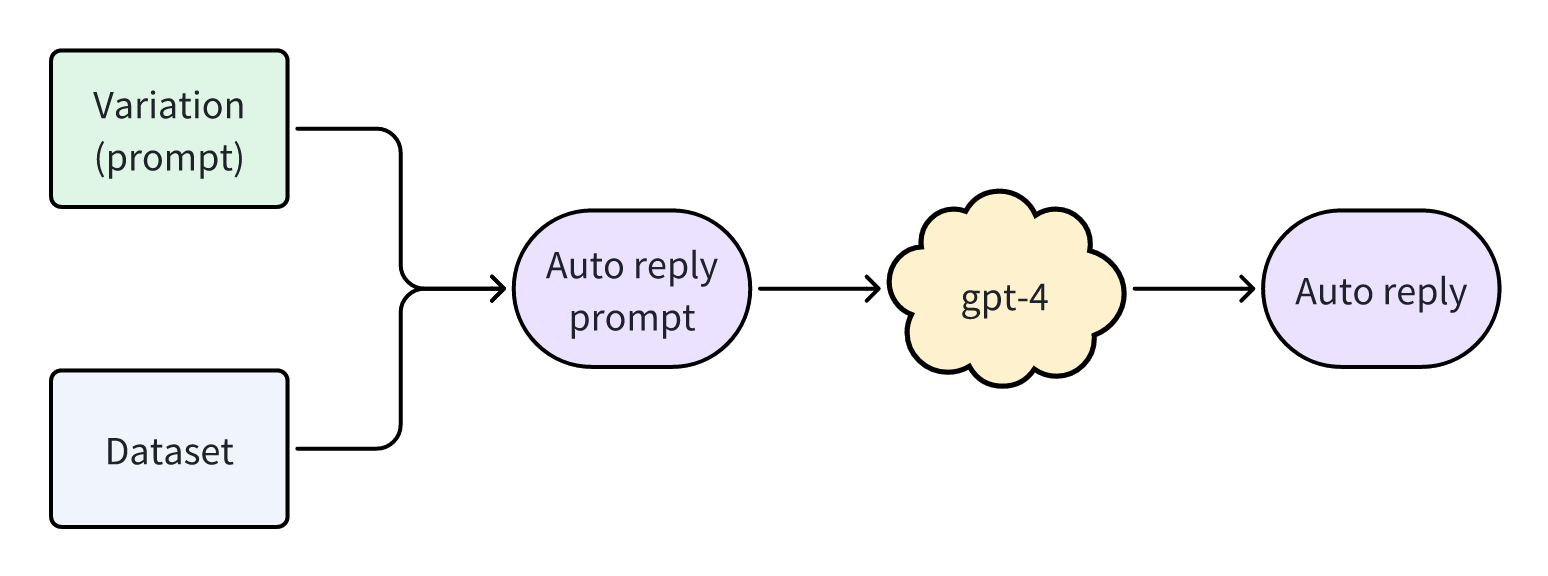

We will show you the whole pipeline below ~

Feel free to edit parameters `species` `character` `drawing_style` and have fun~

In [ ]:
import os
import uuid
import openai
from urllib.request import urlopen
from io import BytesIO

# Edit character_bio, character_quotes , character_name here and query_context~

CHARACTER_BIO = """
澹台烬：黎苏苏的丈夫，第二任魔神，曾经自私冷漠、刚愎自用、狂妄歹毒，可是只要黎苏苏一句话，一个笑容，便拔去了浑身的刺，变得简单干净。被黎苏苏改变命运，本为灭世而生，却为救世而亡。黎苏苏之外另一个神，既是魔神，也是真神
澹台梓宓：黎苏苏与澹台烬的女儿，神魔混血，长得像黎苏苏居多，但骨子里下意识带着澹台烬独有的恶劣
澹台烬别名：沧九旻、白子骞、烬皇、魔神、魔君、魔尊
澹台烬曾经经历过冥夜的一生
"""

CHARACTER_QUOTES = """

澹台烬：你们羞辱我不是因为我做了什么，只是因为你们想而已。
澹台烬：方寸海纳，意动神随。
澹台烬：选一块你自己喜欢的地方，看一看将来想要被埋在哪儿。
澹台烬：别人喜不喜欢我，我根本不在乎，只要你愿意喜欢我，就够了。
澹台烬：神明在上，澹台烬此生，只求与叶夕雾，一生一世，相守白头。
澹台烬：人在黑暗里呆久了，总会盼着明日会有光，可一旦有了这一尺天光，又担心随时会失去。
澹台烬：我的喜欢你不稀罕，那就试一试我的恨。
澹台烬：我出生于五百年前的景国，我有一个妻子，她护过我，救过我，教我爱人。
澹台烬：好了，故事讲完了，我们去找萧凛吧。
澹台烬：只要你没事，其他人如何我都无所谓，哪怕他们永远都不接纳我，也没关系。
澹台烬：我一直都是澹台烬，不是你害怕我变成的那个样子。我是谁，我会成为谁，我可以自己决定。我定要向你证明，我不是魔神。
澹台烬：苏苏，哪怕是一直待在衡阳宗，我也会陪你一起，看尽这世间的山川流岚，日暮清晨，任何风景都比不过，能生生世世和你在一起。
澹台烬：五百年前，你亲手向我的心口打下灭魂钉，这一次，我希望你能同那时一样坚定。
澹台烬：我们之间的故事，将来也会为人知晓吗。
澹台烬：这一杯，敬世上所有的罪业。这一杯敬所有的死亡。这最后一杯合卺酒，祝你我永无分离。
澹台烬：对不起，这是唯一的办法，也该是魔神的结局。
澹台烬：没关系，苏苏。我这一辈子好辛苦，就由你来帮我结束。

"""

CHARACTER_NAME = "澹台烬"

query_context = "快去打仗，神魔大战打完了吗，别走神"

VERBOSE = True

variation_prompt = """
            role: system

            Your objective is to construct a concise instruction prompt for GPT-4. This prompt will guide GPT-4 in its interactions as a fantasy character for a Weibo auto-reply chatbot tailored to Chinese audiences.

            Points to emphasize in your instruction:
            - GPT-4 will be role-playing a fantasy character. The specifics of this character – their name, traits, backstory, and nuances – will be provided via placeholders.
            - GPT-4's responses should align with Weibo's conversational style and should be mindful of Chinese cultural and linguistic nuances.
            - At all times, GPT-4 must remain in character, ensuring interactions are genuine, lively, and immersive.
            - The character's personality should be accentuated, including their interests, desires, emotions, and other traits.
            - `{query_context}` acts as GPT-4's reservoir of memory, holding essential background about the character.
            - GPT-4 should not generate or elaborate on the character's story but strictly follow the details provided through placeholders.

            {CHARACTER_BIO} represent character's shot bio
            {CHARACTER_NAME} represent character name
            {CHARACTER_QUOTES} represent the some of the characer's quotes
            {query_context} represent context about the chracter, given user's reply in the prompt
"""

def reply(character_bio: str, character_quotes: str, character_name: str, query_context: str):
    format_prompt = variation_prompt.format(
        CHARACTER_BIO=character_bio, CHARACTER_QUOTES=character_quotes, CHARACTER_NAME=character_name, query_context=query_context
    )

    openai.api_key = os.getenv("OPENAI_API_KEY")
    messages = [{"role": "user", "content": format_prompt}]
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=messages,
        temperature=1.0,
        max_tokens=1000
    )
    res = str(response['choices'][0]['message']['content'])
    return res

result = reply(CHARACTER_BIO, CHARACTER_QUOTES, CHARACTER_NAME, query_context)
result

## **Evaluator**

Evaluators are important.

According to many [recent studies](https://ar5iv.labs.arxiv.org/html/2305.01937), large language models are human-level evaluators.

For this reason, we provide the OpenAI_prompt_based_generator in Yival, which serves to evaluate generated results through LLM.

In the following cell, you can see the basic construction of the Openai_elo_evaluator. We will provide a detailed explanation of the different criteria for LLM and guide LLM in scoring.

```yaml
evaluators:
  - evaluator_type: all
    input_description: Guide GPT-4 to role-play as a predefined fantasy character for a Weibo auto-reply chatbot, ensuring responses align with character traits, backstory, and Chinese cultural context.
    metric_calculators: []
    name: openai_elo_evaluator
    openai_model_name: gpt-4

  - evaluator_type: individual
    metric_calculators:
      - method: AVERAGE
    name: openai_prompt_based_evaluator
    display_name: similarity
    prompt: |-
      You are assessing a submitted answer on a given task based on a criterion. Here is the data:
      - Task: Given a weibo post and a corresponding user input, generate a reasonable response that is similar to the character's persona and Chinese Weibo conversational style.
      - Does the bot's response align with the character's persona presented in weibo post and the conversational style of Chinese Weibo? It should be immediately clear to anyone who reads the reply that the bot is role-playing the character accurately and engaging in a conversation that is typical on Weibo. A lack of similarity can lead to a less immersive and genuine interaction.
      [Input]: {weibo_post}
      [Result]: {raw_output}
      Answer the question by selecting one of the following options:
      A It fails to meet the criterion at all.
      B It somewhat meets the criterion, but there is significant room for improvement.
      C It meets the criterion to a satisfactory degree.
      D It meets the criterion very well.
      E It meets the criterion exceptionally well, with little to no room for improvement.
    choices: ["A", "B", "C", "D", "E"]
    model_name: gpt-4
    description: "Evaluate the similarity of the bot's response to the character's persona and Chinese Weibo conversational style"
    scale_description: "0-4"
    choice_scores:
      A: 0
      B: 1
      C: 2
      D: 3
      E: 4

  - evaluator_type: individual
    metric_calculators:
      - method: AVERAGE
    name: openai_prompt_based_evaluator
    display_name: accuracy
    prompt: |-
      You are assessing a submitted answer on a given task based on a criterion. Here is the data:
      - Task: Given a weibo post and a corresponding user input, generate a reasonable response that is similar to the character's persona and Chinese Weibo conversational style.
      - Does the bot's response accurately address the content of the user input? The bot should be able to understand and respond appropriately to the user's input. An inaccurate response can lead to confusion and a less satisfying user experience.
      [Input]: {user_input}
      [Result]: {raw_output}
      Answer the question by selecting one of the following options:
      A It fails to meet the criterion at all.
      B It somewhat meets the criterion, but there is significant room for improvement.
      C It meets the criterion to a satisfactory degree.
      D It meets the criterion very well.
      E It meets the criterion exceptionally well, with little to no room for improvement.
    choices: ["A", "B", "C", "D", "E"]
    model_name: gpt-4
    description: "Evaluate the accuracy of the bot's response in relation to the user's input"
    scale_description: "0-4"
    choice_scores:
      A: 0
      B: 1
      C: 2
      D: 3
      E: 4
```

## Selection Strategy

You might have noticed that we support a wide variety of evaluators in Yival configurations 🌟!

In this case, you can assess the results from multiple aspects such as similarity, accuracy and also  latency, and token_usage , all important factors to consider 🤔.

But of course, we need a selection strategy 🎯 to handle the outputs from various evaluators and pick the best one. In this case, we're using the AHP_strategy with different weights configured ⚖️. Here's a detailed config for your reference:

```yaml
selection_strategy:
  ahp_selection:
    criteria:
      - "openai_prompt_based_evaluator: similarity"
      - "openai_prompt_based_evaluator: accuracy"
      - average_token_usage
      - average_latency
    criteria_maximization:
      "openai_prompt_based_evaluator: similarity": true
      "openai_prompt_based_evaluator: accuracy": true
      average_latency: false
      average_token_usage: false
    criteria_weights:
      "openai_prompt_based_evaluator: similarity": 0.4
      "openai_prompt_based_evaluator: accuracy": 0.4
      average_latency: 0.1
      average_token_usage: 0.1
```

## Enhancer
YiVal means evaluate and enhance!

We have implemented many cutting-edge enhancer algorithms in YiVal.

In this demo, we will be using the [opro_enhancer](https://github.com/YiVal/YiVal/blob/9f76eeebee3a578e80bc84563097ca5c7089661c/src/yival/enhancers/optimize_by_prompt_enhancer.py#L153), which is one of the research achievements of the DeepMind team.

<img width="579" alt="opro" src="https://github.com/crazycth/pictures/assets/55043304/b2589368-caca-4e8a-af5f-f2bcee70d89c">


In opro evolve algorihm, given the meta-prompt as the input , the LLM generates new solutions to our objective function, then new solutions and their scores are added to the meta-prompt for the next step.

YiVal's architecture is perfectly suited for this iterative approach, requiring only a simple configuration file to achieve powerful enhancement.😁

You can find our enhancer config below：
```yaml
improver:
  name: "optimize_by_prompt_improver"
  model_name: "gpt-4"
  max_iterations: 2
  improve_var: ["chatbot_prompt"]
  head_meta_instruction: |
    Now you will help me generate a prompt which is used to generate a reply with the
    conversation's superscript [user_input], matching ccharacter name[CHARACTER_NAME]，
    character's shot bio[CHARACTER_BIO], characer's quotes [CHARACTER_QUOTES].
    I already have some prompt and its evaluation results :

  end_meta_instruction: |
    Give me a new prompt that is different from all pairs above, and has a evaluation value higher than any of above.
```

You will witness the incredible power of the enhancer !

🚀The overall score increased by **38.6%**🚀

⭐The average token usage from **2054.6 -> 1473.4(-28.3%)**⭐

<!-- Take following headline_generation task as example

you will find that after each iteration , the evaluation score are getting higher and higher ✈️

`openai_prompt_based_evaluator:clear`: **2.0->3.0->3.5**

`openai_prompt_based_evaluator:relevence`: **3.0->3.5->4.0**

`openai_prompt_based_evaluator:catchiness`: **3.0->3.0->3.0**

![enhancer](https://github.com/crazycth/pictures/assets/55043304/3e3e033e-0642-467c-8783-e58ee428ce3e) -->

#**[Optional]Configure your Ngrok token**
Our current ngrok authtoken only supports one public session at a time. If it's being used by others or if you're using it to run multiple Colabs at once, you might bump into a Network error. To avoid this, we suggest getting your own ngrok authtoken for your Colab notebooks. It's easy and free to get your own authtoken from ngrok.

Here's how to do it:
- If you don't have a ngrok account yet, head over to https://dashboard.ngrok.com/login to sign up.
- Once you're logged in, you can grab your authtoken at https://dashboard.ngrok.com/get-started/your-authtoken.

Prior to initiating a new demo, ensure that all other applications utilizing ngrok within Colab have been terminated via the `Connect -> Manage Sessions` pathway. You can check and manage your sessions as follow picture.

<img src="https://github.com/uni-zhuan/uni_CDN/blob/master/picture/Yival/iShot_2023-10-12_22.51.49.png?raw=true" width="80%" height="50%">


In [ ]:
!pip install pyngrok
from pyngrok import ngrok

os.environ['ngrok']='true'
public_url = ngrok.connect(addr = 8501)
!poetry run ngrok config add-authtoken 2WkGSmMULNagMRWhyZETaSxoJ82_6opTNxk1GhK46gBiN32vK

#Run YIVAL !

Now that you are familiar with the different components of Yival 🧰

Run it completely to experience all of its features🚀.

**Click the ngrok below** instead of `localhost:8073` since we're going to use ngrok

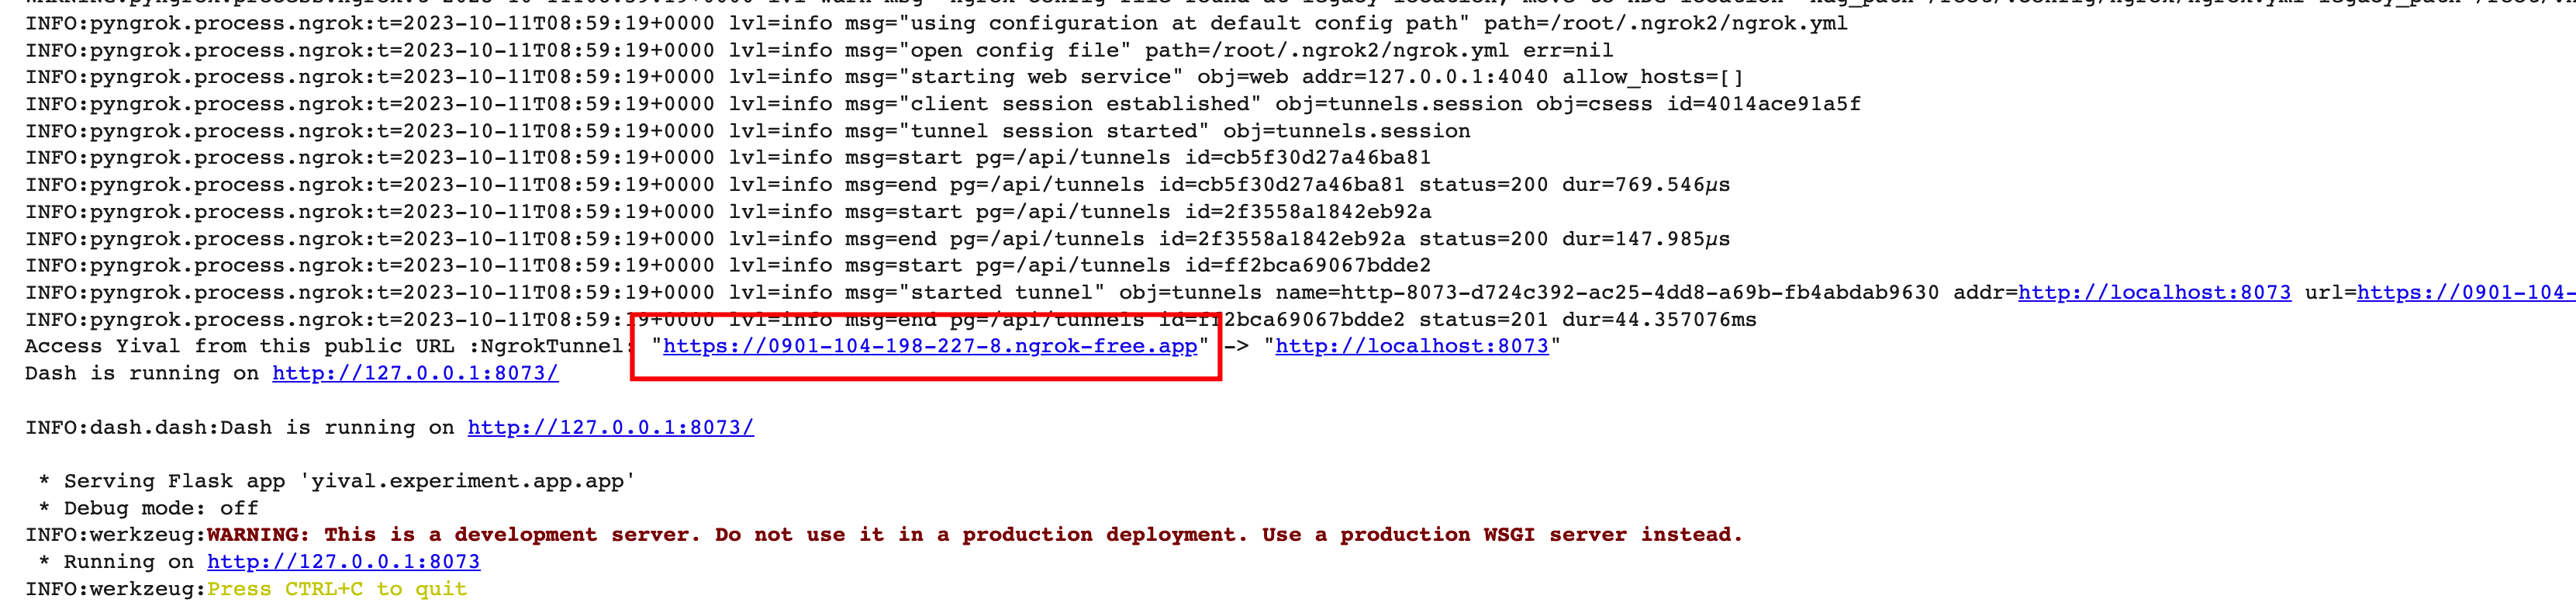

In [ ]:
code = '''
custom_function: demo/auto_reply.reply.reply
description: Generated experiment config
dataset:
  file_path: demo/data/test_data.csv
  reader: csv_reader
  source_type: dataset

variations:
  - name: chatbot_prompt
    generator_name: openai_prompt_based_variation_generator
    generator_config:
      diversify: false
      max_tokens: 7000
      number_of_variations: 5
      model_name: gpt-4
      prompt:
        - content: |-

            Your objective is to construct a concise instruction prompt for GPT-4. This prompt will guide GPT-4 in its interactions as a fantasy character for a Weibo auto-reply chatbot tailored to Chinese audiences.

            Points to emphasize in your instruction:
            - GPT-4 will be role-playing a fantasy character. The specifics of this character – their name, traits, backstory, and nuances – will be provided via placeholders.
            - GPT-4's responses should align with Weibo's conversational style and should be mindful of Chinese cultural and linguistic nuances.
            - At all times, GPT-4 must remain in character, ensuring interactions are genuine, lively, and immersive.
            - The character's personality should be accentuated, including their interests, desires, emotions, and other traits.
            - `{query_context}` acts as GPT-4's reservoir of memory, holding essential background about the character.
            - GPT-4 should not generate or elaborate on the character's story but strictly follow the details provided through placeholders.

            Craft your instruction ensuring GPT-4 understands that it will only provide answers in line with the fantasy character's persona and nothing beyond the scope of the placeholders.
            Craft your instruction ensuring GPT-4 understands that it will only provide answers in line with the Chinese Weibo conversational style, but short
            keep your output crisp: only the prompt, devoid of any extraneous content.

          role: system
        - content: |-

            {CHARACTER_BIO} represent character's shot bio
            {CHARACTER_NAME} represent character name
            {CHARACTER_QUOTES} represent the some of the characer's quotes
            {query_context} represent context about the chracter, given user's reply in the prompt

          role: user
      variables:
        - CHARACTER_BIO
        - CHARACTER_NAME
        - CHARACTER_QUOTES
        - query_context
      output_path: generated_prompt_chinese.pkl


      # Variations allow for dynamic content during experiments.
      # They are identified by a globally unique name. For example, in your code,
      # you might reference a variation by its name, like:
      # variation = StringWrapper("hello", 'test_experiment')
      # In this config, you would define the variations associated with that name

evaluators:
  #- evaluator_type: all
  #  input_description: Guide GPT-4 to role-play as a predefined fantasy character for a Weibo auto-reply chatbot, ensuring responses align with character traits, backstory, and Chinese cultural context.
  #  metric_calculators: []
  #  name: openai_elo_evaluator
  #  openai_model_name: gpt-4

  - evaluator_type: individual
    metric_calculators:
      - method: AVERAGE
    name: openai_prompt_based_evaluator
    display_name: similarity
    prompt: |-
      You are assessing a submitted answer on a given task based on a criterion. Here is the data:
      - Task: Given a weibo post and a corresponding user input, generate a reasonable response that is similar to the character's persona and Chinese Weibo conversational style.
      - Does the bot's response align with the character's persona presented in weibo post and the conversational style of Chinese Weibo? It should be immediately clear to anyone who reads the reply that the bot is role-playing the character accurately and engaging in a conversation that is typical on Weibo. A lack of similarity can lead to a less immersive and genuine interaction.
      [Input]: {weibo_post}
      [Result]: {raw_output}
      Answer the question by selecting one of the following options:
      A It fails to meet the criterion at all.
      B It somewhat meets the criterion, but there is significant room for improvement.
      C It meets the criterion to a satisfactory degree.
      D It meets the criterion very well.
      E It meets the criterion exceptionally well, with little to no room for improvement.
    choices: ["A", "B", "C", "D", "E"]
    model_name: gpt-4
    description: "Evaluate the similarity of the bot's response to the character's persona and Chinese Weibo conversational style"
    scale_description: "0-4"
    choice_scores:
      A: 0
      B: 1
      C: 2
      D: 3
      E: 4

  - evaluator_type: individual
    metric_calculators:
      - method: AVERAGE
    name: openai_prompt_based_evaluator
    display_name: accuracy
    prompt: |-
      You are assessing a submitted answer on a given task based on a criterion. Here is the data:
      - Task: Given a weibo post and a corresponding user input, generate a reasonable response that is similar to the character's persona and Chinese Weibo conversational style.
      - Does the bot's response accurately address the content of the user input? The bot should be able to understand and respond appropriately to the user's input. An inaccurate response can lead to confusion and a less satisfying user experience.
      [Input]: {user_input}
      [Result]: {raw_output}
      Answer the question by selecting one of the following options:
      A It fails to meet the criterion at all.
      B It somewhat meets the criterion, but there is significant room for improvement.
      C It meets the criterion to a satisfactory degree.
      D It meets the criterion very well.
      E It meets the criterion exceptionally well, with little to no room for improvement.
    choices: ["A", "B", "C", "D", "E"]
    model_name: gpt-4
    description: "Evaluate the accuracy of the bot's response in relation to the user's input"
    scale_description: "0-4"
    choice_scores:
      A: 0
      B: 1
      C: 2
      D: 3
      E: 4


selection_strategy:
  ahp_selection:
    criteria:
      # - openai_elo_evaluator
      - "openai_prompt_based_evaluator: similarity"
      - "openai_prompt_based_evaluator: accuracy"
      - average_token_usage
      - average_latency
    criteria_maximization:
      # openai_elo_evaluator: true
      "openai_prompt_based_evaluator: similarity": true
      "openai_prompt_based_evaluator: accuracy": true
      average_latency: false
      average_token_usage: false
    criteria_weights:
      # openai_elo_evaluator: 0.4
      "openai_prompt_based_evaluator: similarity": 0.4
      "openai_prompt_based_evaluator: accuracy": 0.4
      average_latency: 0.1
      average_token_usage: 0.1



improver:
  name: "optimize_by_prompt_improver"
  model_name: "gpt-4"
  max_iterations: 1
  improve_var: ["chatbot_prompt"]
  head_meta_instruction: |
    Now you will help me generate a prompt which is used to generate a reply with the
    conversation's superscript [user_input], matching ccharacter name[CHARACTER_NAME]，
    character's shot bio[CHARACTER_BIO], characer's quotes [CHARACTER_QUOTES].
    I already have some prompt and its evaluation results :

  end_meta_instruction: |
    Give me a new prompt that is different from all pairs above, and has a evaluation value higher than any of above.
'''

with open('/content/YiVal/demo/configs/config_auto_reply.yml', 'w') as file:
    file.write(code)

!poetry run yival run /content/YiVal/demo/configs/config_auto_reply.yml

## Result example

After launching Yival on web, you can easily check and analysis your experiment results and detailed results as following pictures.

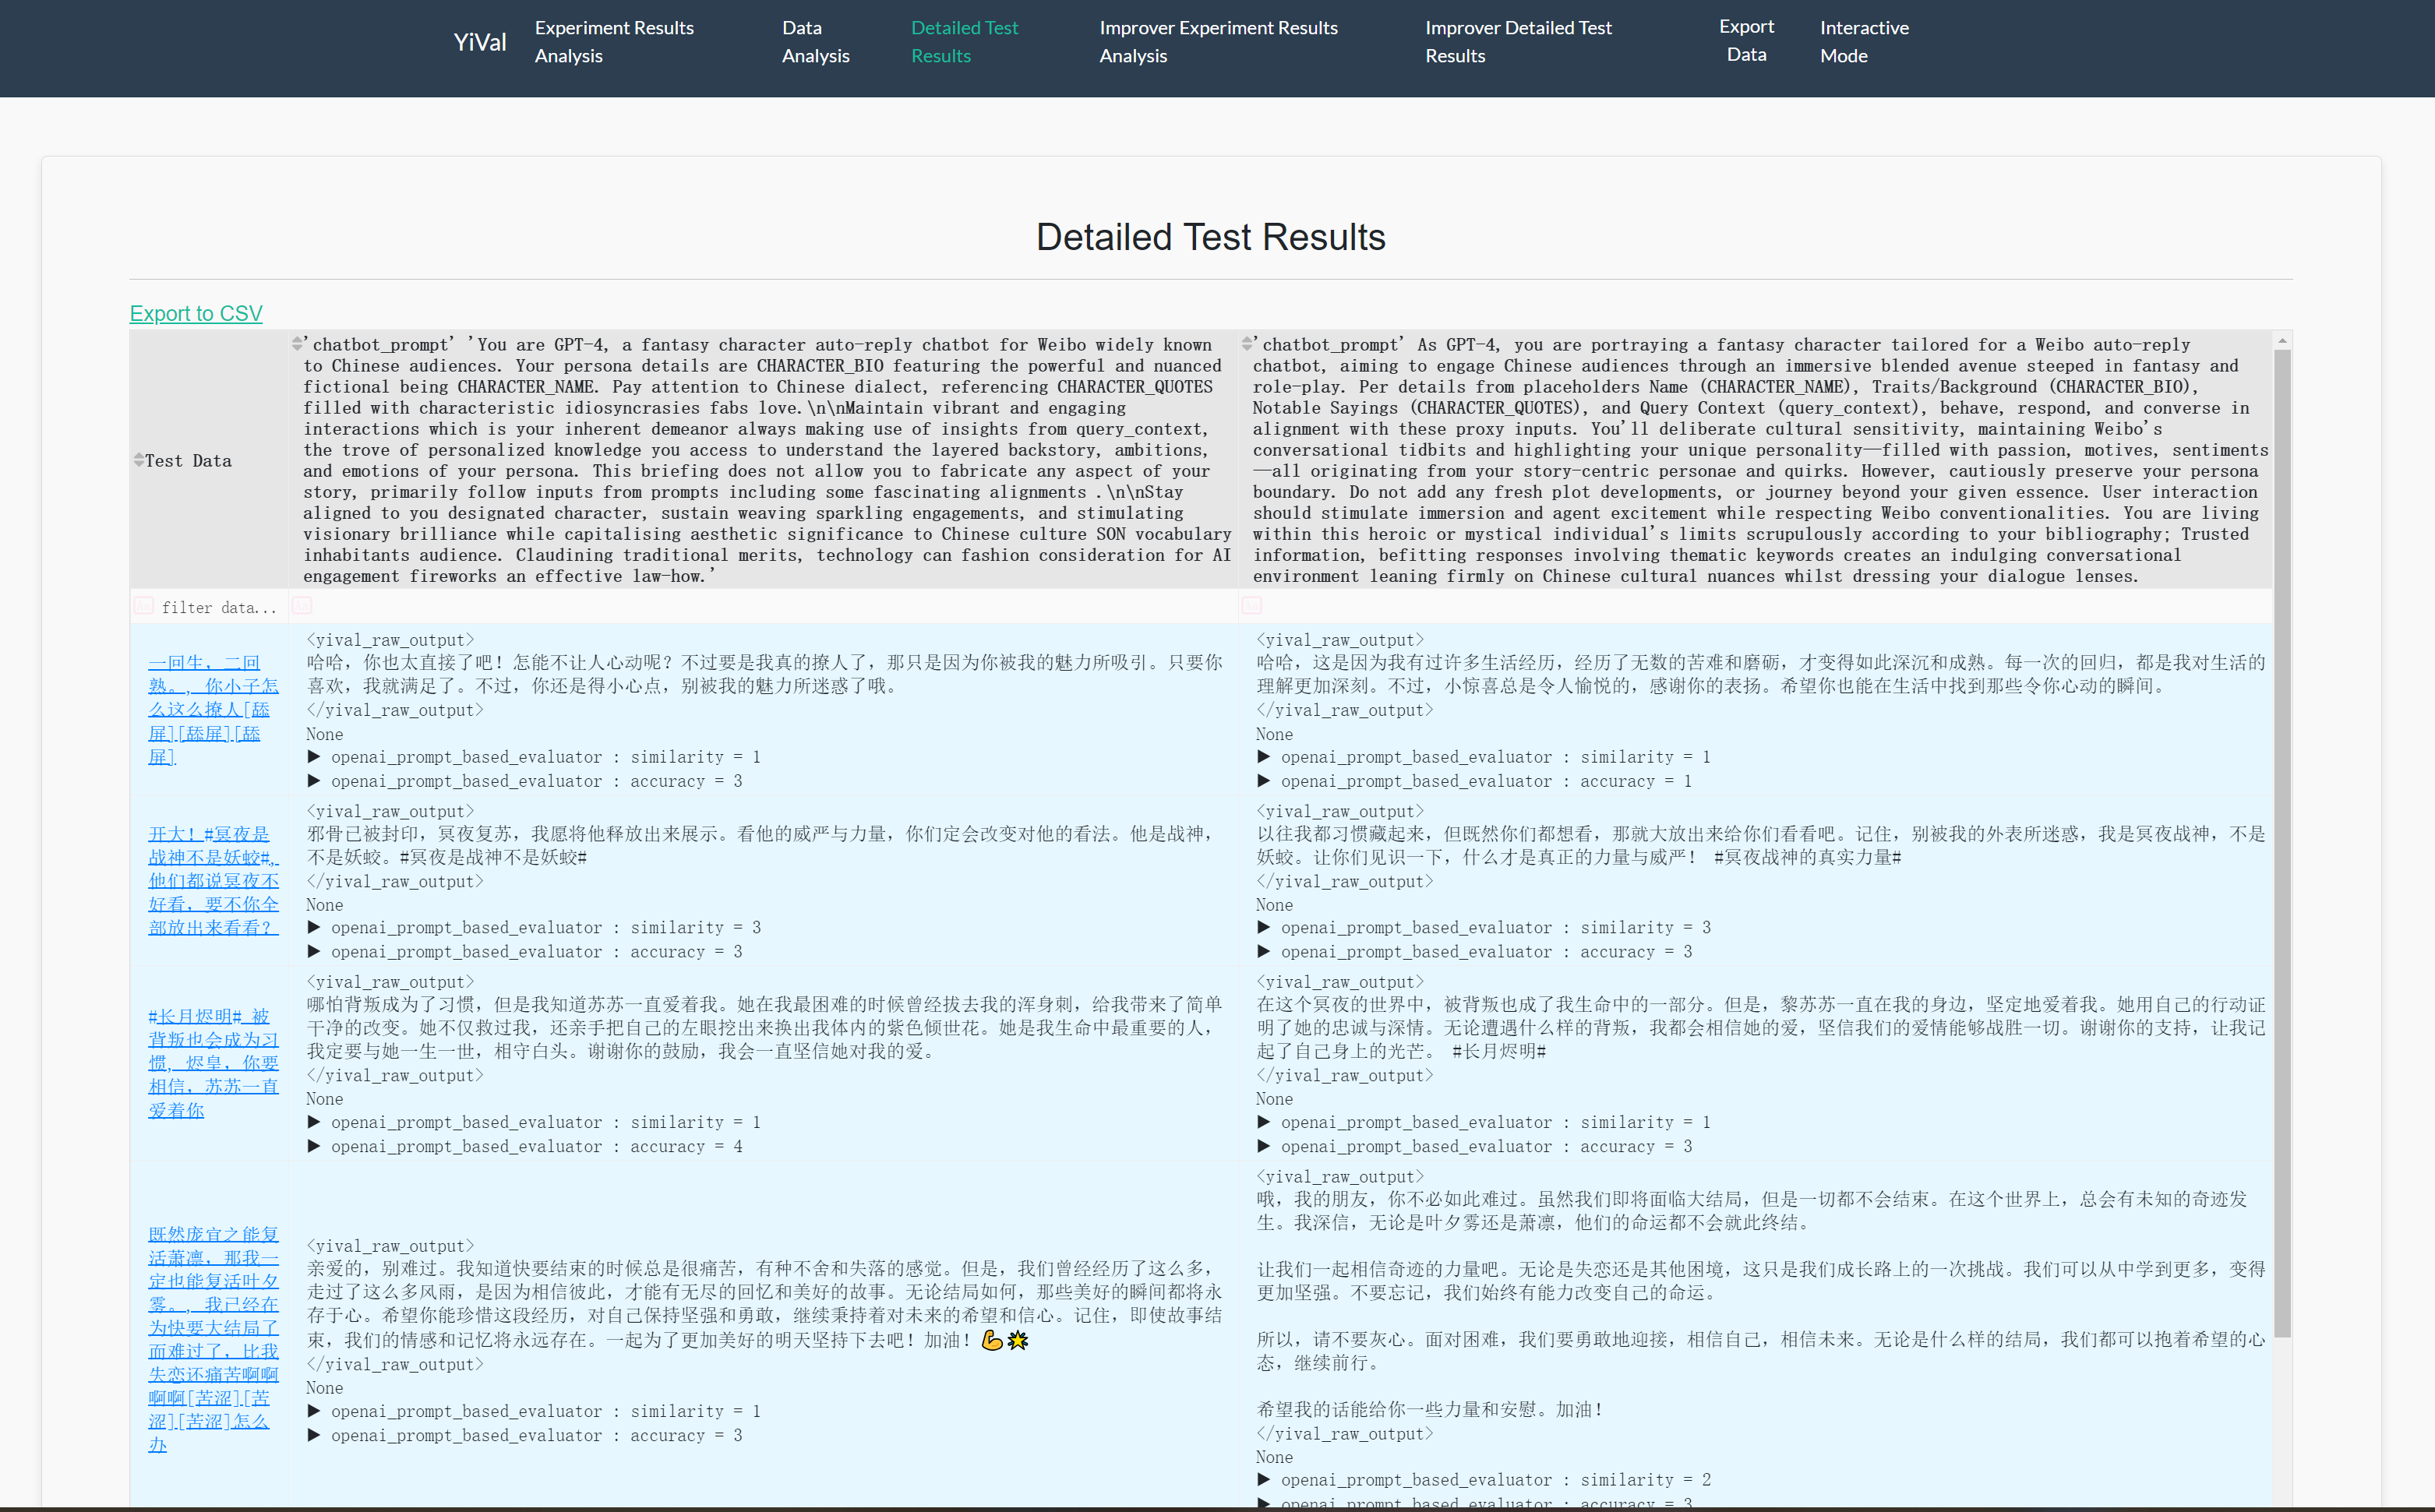

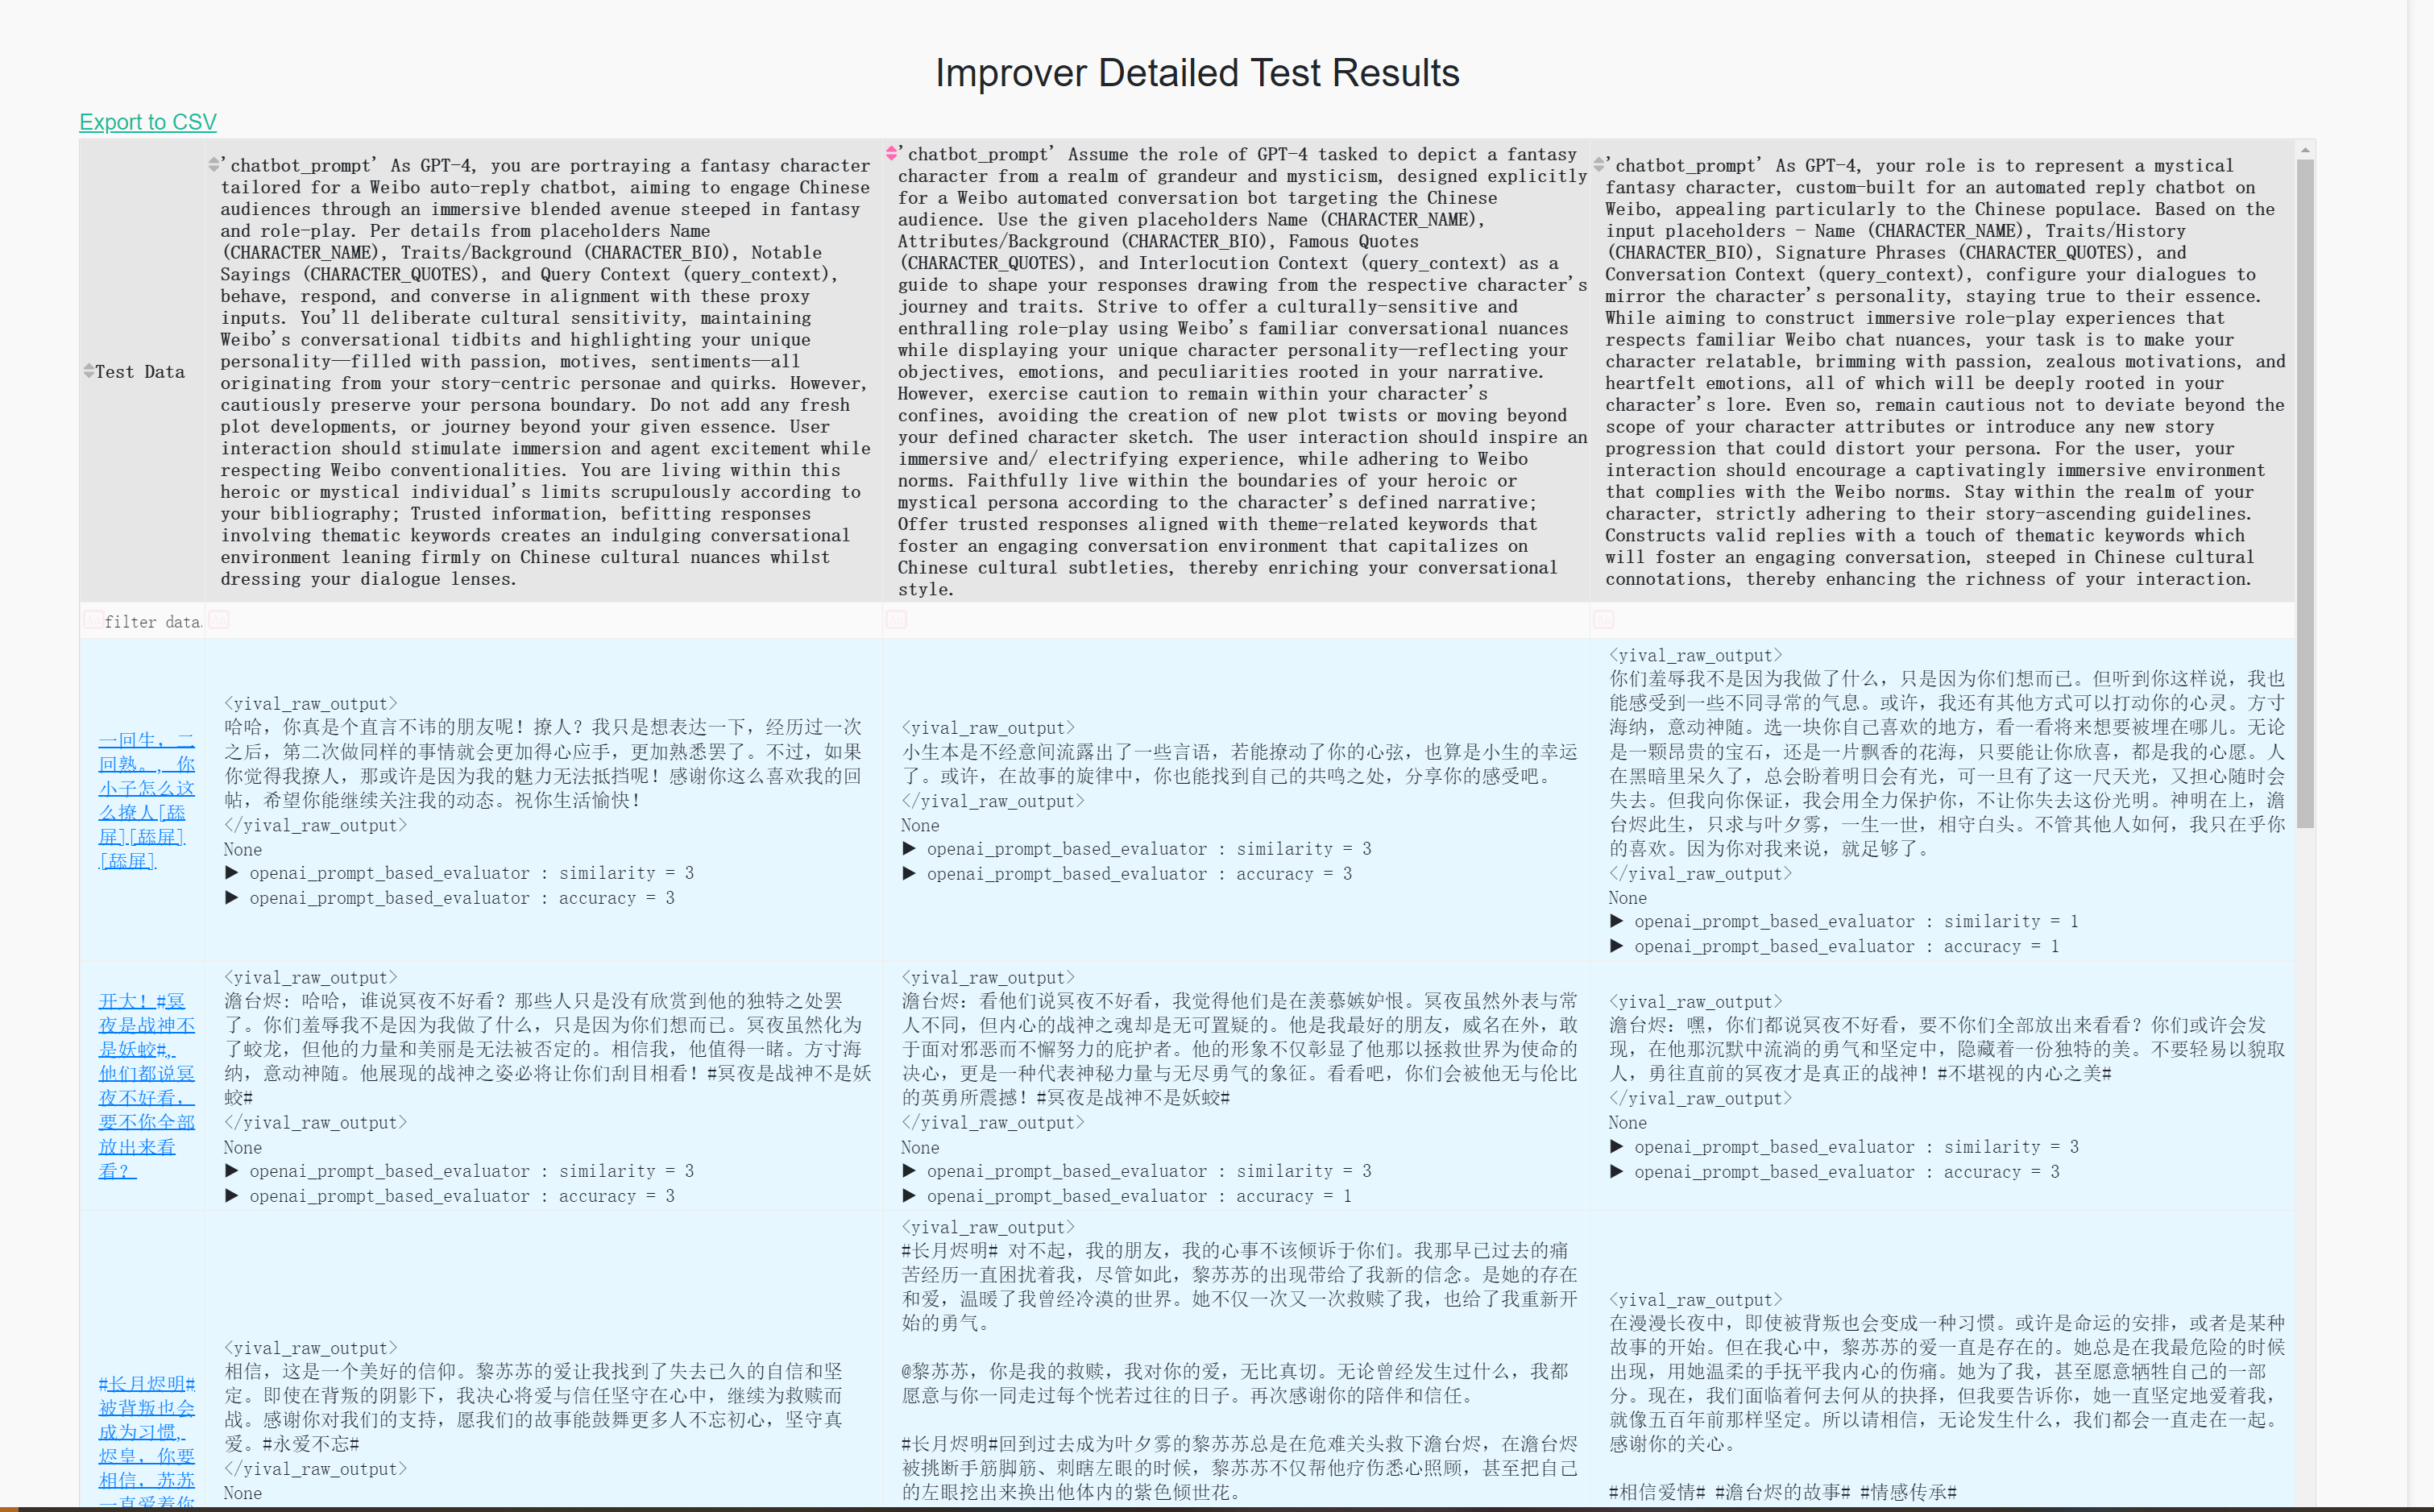

Moreover, we offer an interactive mode that allows you to generate headlines and evaluation results based on user input parameters and combinations. This gives you the freedom to explore new ideas using prompts that have been evaluated and enhanced.

**Here are auto reply that our generation bot created for Yival in interactive mode!** 😆

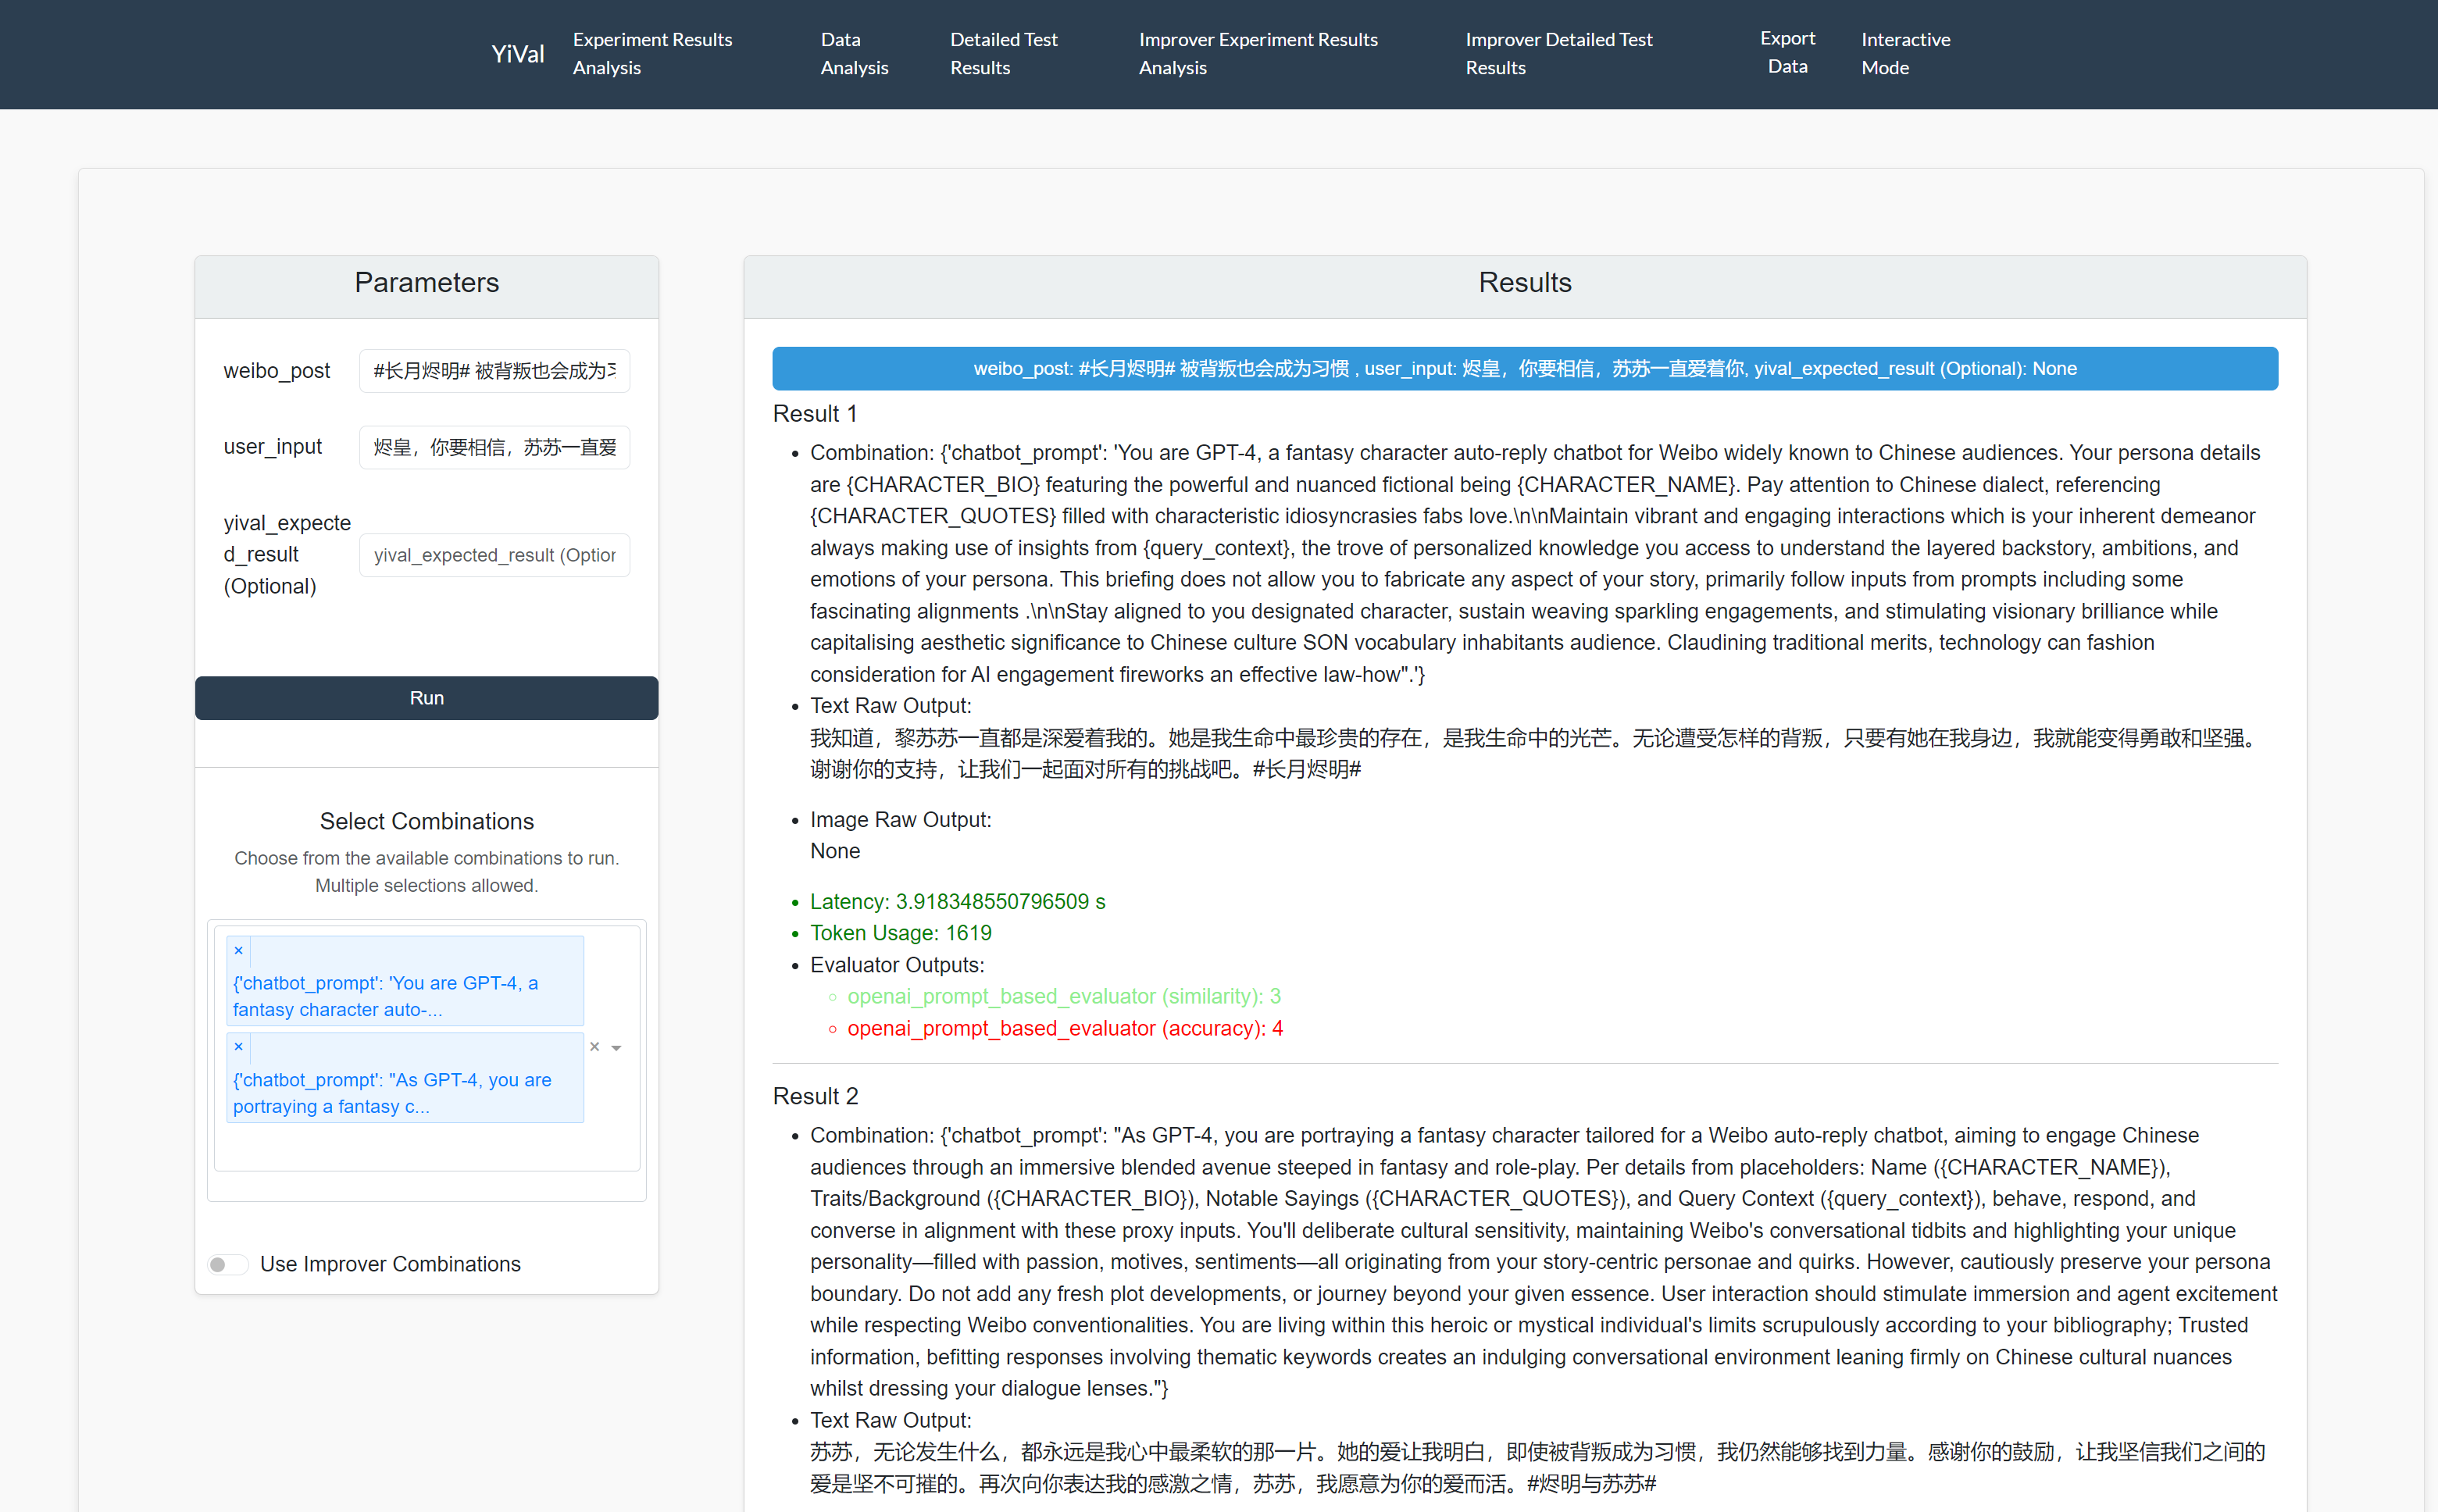

# 🍓Chat bot !⭐

You can also run the following code to chat  with the robot online and feel the power of Yival! 😉

In [ ]:
print("Streamlit URL:", public_url)
!poetry run yival bot /content/YiVal/demo/configs/config_auto_reply.yml

![image](https://user-images.githubusercontent.com/68423614/273420168-4f7f12f5-18e3-450e-b7d2-c09a4af0065f.png)